In [1]:
import pymysql
from sqlalchemy.types import String, Float, Integer
from sqlalchemy import DateTime
from sqlalchemy import create_engine
from sqlalchemy import exc
import os
import re
import pandas as pd
import numpy as np
import datetime as dt#准备工作，配置环境。

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

from pylab import mpl
mpl.rcParams['font.sans-serif']=['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif']=['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

In [6]:
# 导入数据
conn = pymysql.connect(	
    host = '47.116.3.109',	
    user = 'dngj',	
    passwd = '603603',	
    db = 'finance',	
    port=3306,	
    charset = 'utf8'	
    )	
rates = pd.read_sql('select * from finance.rates1',conn)
secondary_rate_sec = pd.read_sql('select * from finance.secondary_rate_sec',conn)

In [7]:
rates

,国债1年,国债3年,国债5年,国债7年,国债10年,地方1年,地方3年,地方5年,地方7年,地方10年,...,国债3月,国债6月,国债20年,国开3月,国开6月,国开20年,国开30年,cd_3m_aaa+,国债2年,date
0,2.5850,2.7271,2.8674,3.0057,3.2096,NaN,NaN,NaN,NaN,NaN,...,2.5312,2.5492,3.8586,NaN,2.4262,4.2020,4.0462,NaN,2.6563,2002-01-04
1,2.6009,2.7380,2.8728,3.0055,3.2003,NaN,NaN,NaN,NaN,NaN,...,2.5489,2.5663,3.8140,NaN,2.4827,4.2375,4.0414,NaN,2.6697,2002-01-07
2,1.9156,2.3842,2.7890,3.1302,3.5225,NaN,NaN,NaN,NaN,NaN,...,1.7235,1.7885,3.7951,NaN,2.3470,4.3868,4.1288,NaN,2.1578,2002-01-08
3,1.9040,2.4036,2.8317,3.1884,3.5896,NaN,NaN,NaN,NaN,NaN,...,1.6983,1.7680,3.7660,NaN,2.3652,4.3702,4.0866,NaN,2.1627,2002-01-09
4,1.8987,2.3954,2.8216,3.1772,3.5784,NaN,NaN,NaN,NaN,NaN,...,1.6942,1.7635,3.7693,NaN,2.3688,4.3747,4.0863,NaN,2.1559,2002-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,2.5252,2.8089,2.9598,3.0763,3.0877,2.5446,3.0581,3.2363,3.3680,3.4354,...,1.9658,2.2010,3.5285,1.9967,2.3052,3.7184,3.9475,2.4200,2.7200,2021-06-22
4863,2.5012,2.7860,2.9514,3.0671,3.0853,2.5432,3.0454,3.2232,3.3672,3.4303,...,1.9509,2.1912,3.5185,1.9700,2.2672,3.7127,3.9175,2.4302,2.6949,2021-06-23
4864,2.4690,2.7675,2.9489,3.0714,3.0828,2.5229,3.0230,3.2156,3.3595,3.4157,...,1.9661,2.1948,3.5172,1.9825,2.2922,3.7123,3.8875,2.4221,2.6776,2021-06-24
4865,2.4437,2.7614,2.9506,3.0783,3.0827,2.4950,3.0147,3.2043,3.3553,3.4058,...,1.9151,2.1855,3.5122,1.9503,2.2549,3.7147,3.8775,2.4191,2.6655,2021-06-25


In [35]:
rates1 = rates.loc[rates['date'] >= '2009-01-05']
margin1 = rates1['国开10年']-rates1['国债10年']

<ipython-input-36-05b72bd014c6>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(rates1['国债10年'][:-1],margin1[:-1], marker='o',color = '', edgecolors='#3778bf')
<ipython-input-36-05b72bd014c6>:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(rates1['国债10年'][:1],margin1[:1], marker='o',color = '', edgecolors='#f0833a')


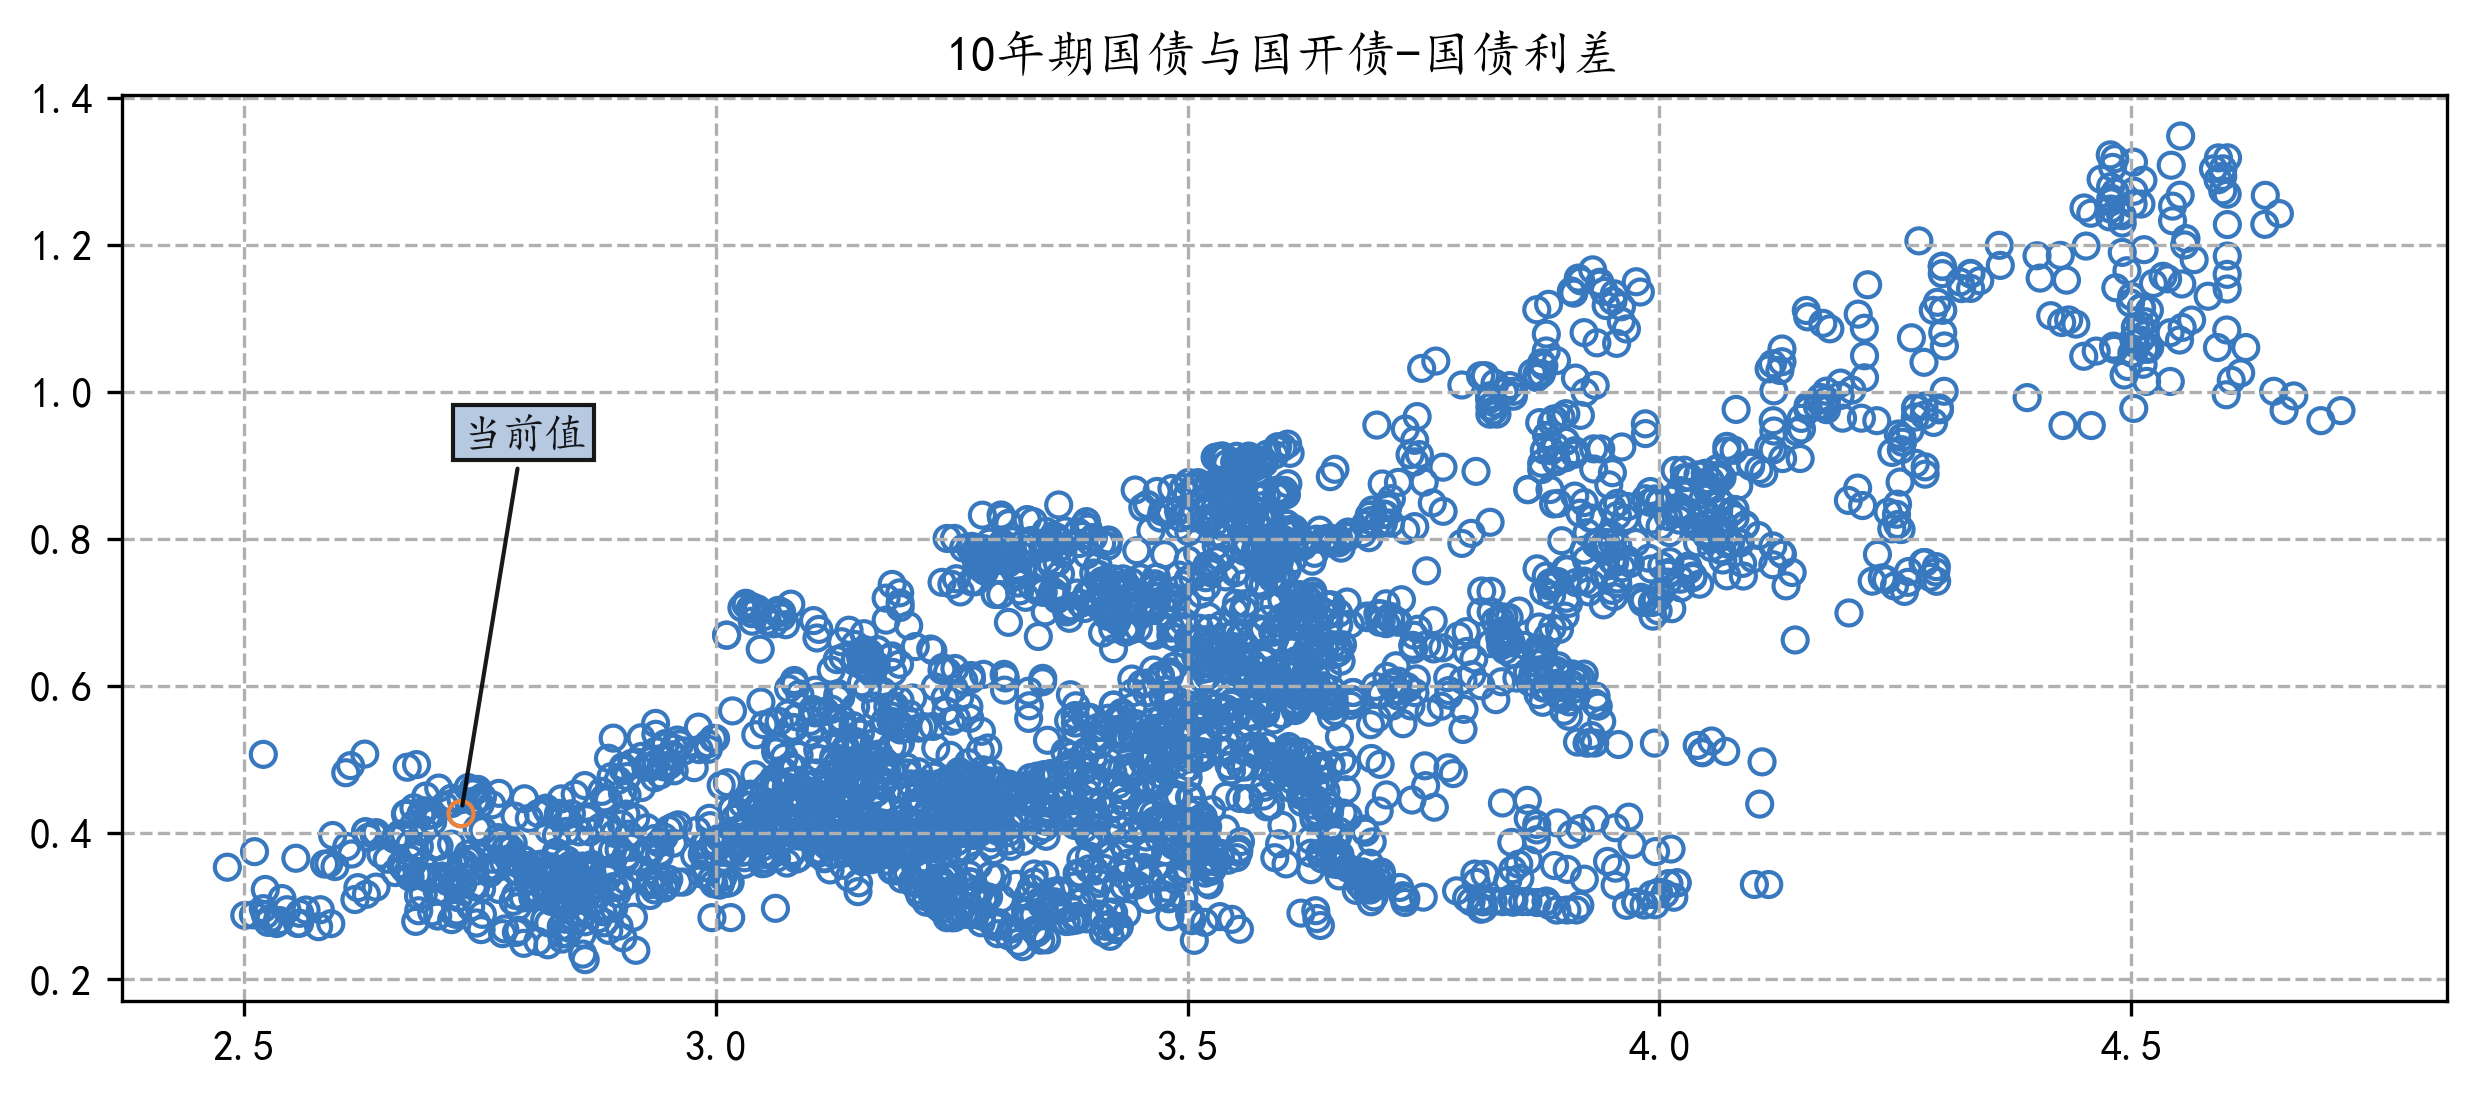

In [36]:
#10年期国债与国开债-国债利差
plt.figure(figsize=(10,4),dpi=300, facecolor='w')
plt.grid(ls='--')
plt.rc('axes', axisbelow=True)
plt.scatter(rates1['国债10年'][:-1],margin1[:-1], marker='o',color = '', edgecolors='#3778bf')
plt.scatter(rates1['国债10年'][:1],margin1[:1], marker='o',color = '', edgecolors='#f0833a')
plt.title('10年期国债与国开债-国债利差', fontsize=12)
plt.annotate('当前值',xy=(rates1['国债10年'][:1],margin1[:1]),xytext=(rates1['国债10年'][:1],margin1[:1]+0.5),color="k",weight="bold",alpha=0.9,arrowprops=dict(arrowstyle="-",connectionstyle="arc3",color="k",alpha=0.9),bbox={'facecolor': 'lightsteelblue', 'edgecolor':'k','alpha': 0.9,'pad':2},fontsize=10)
plt.savefig('10年期国债与国开债-国债利差.jpg', dpi=300, bbox_inches = 'tight')

In [37]:
rates1.index = rates1['date']
keymargin1 = rates1[['国债6月', '国债1年', '国债3年','国债5年', '国债7年', '国债10年']]
keymargin1.columns = ['6M', '1Y', '3Y','5Y', '7Y', '10Y']
keymargin2 = rates1[['国开6月', '国开1年', '国开3年','国开5年', '国开7年', '国开10年']]
keymargin2.columns = ['6M', '1Y', '3Y','5Y', '7Y', '10Y']
keymargin = pd.concat([keymargin1[-1:],keymargin2[-1:]],axis=0)
keymargin.index = ['国债', '国开债']
keymargin= pd.DataFrame(keymargin.values.T, index=keymargin.columns, columns=keymargin.index)
keymargin['国开债-国债'] = (keymargin['国开债'] - keymargin['国债'])*100
keymargin

,国债,国开债,国开债-国债
6M,2.1904,2.2471,5.67
1Y,2.4705,2.5140,4.35
3Y,2.7935,3.0326,23.91
5Y,2.9708,3.2739,30.31
7Y,3.0999,3.4748,37.49
10Y,3.0903,3.5001,40.98


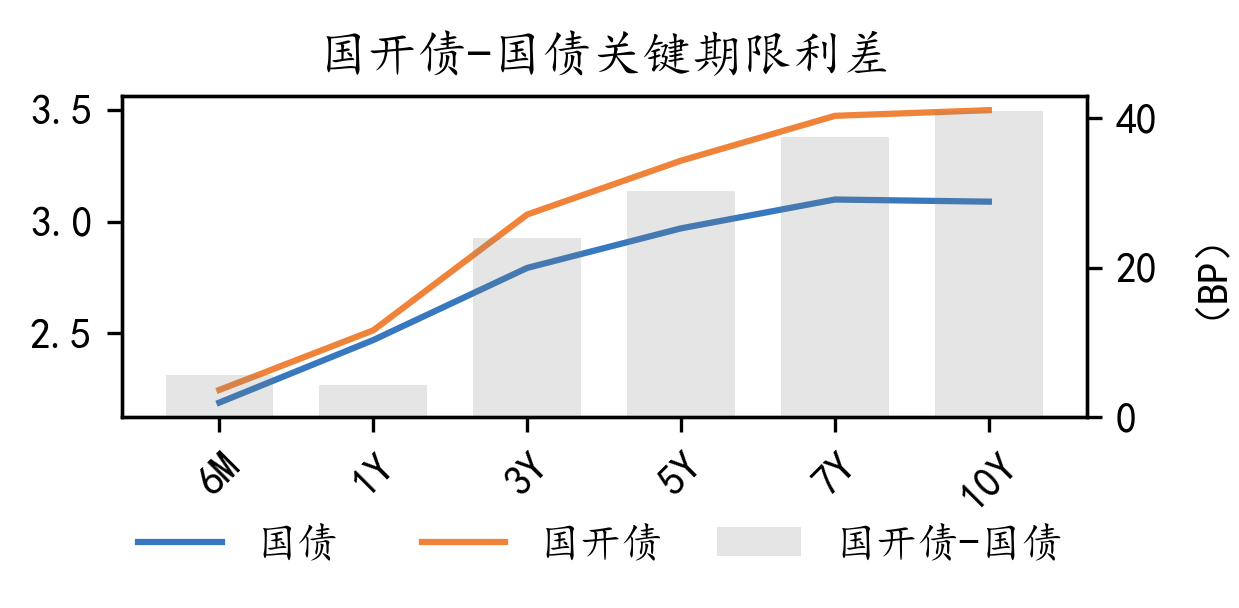

In [41]:
#国开债-国债关键期限利差
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(keymargin.index,keymargin['国债'],'#3778bf',label="国债")
plt.plot(keymargin.index,keymargin['国开债'],'#f0833a',label='国开债')
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0,-0.5),borderaxespad = 0.,fontsize=10,frameon=False)
plt.xticks(fontsize=10 ,rotation=45)
plt.yticks(fontsize=10,rotation=0)

plt.twinx()
plt.bar(keymargin.index,keymargin['国开债-国债'], width=0.7, color='gray',alpha = 0.2,label='国开债-国债')
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.6,-0.5),borderaxespad = 0.,fontsize=10,frameon=False)
plt.ylabel('（BP）',fontsize=10)
plt.title('国开债-国债关键期限利差', fontsize=12)
plt.savefig('信用利差水平.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

In [42]:
rates2 = rates.loc[rates['date'] >= '2016-01-04']
rates2.index = rates2['date']
rates2 = rates2[['国开10年', '农发10年', '口行10年']]
rates2['农发-国开'] = (rates2['农发10年'] - rates2['国开10年'])*100
rates2['口行-国开'] = (rates2['口行10年'] - rates2['国开10年'])*100
rates2

,国开10年,农发10年,口行10年,农发-国开,口行-国开
date,,,,,
2016-01-04,3.1775,3.3489,3.3489,17.14,17.14
2016-01-05,3.2175,3.3598,3.3598,14.23,14.23
2016-01-06,3.1826,3.3388,3.3388,15.62,15.62
2016-01-07,3.1426,3.2824,3.2824,13.98,13.98
2016-01-08,3.1080,3.2527,3.2527,14.47,14.47
...,...,...,...,...,...
2021-06-22,3.4970,3.5458,3.5532,4.88,5.62
2021-06-23,3.4951,3.5433,3.5507,4.82,5.56
2021-06-24,3.4951,3.5351,3.5425,4.00,4.74


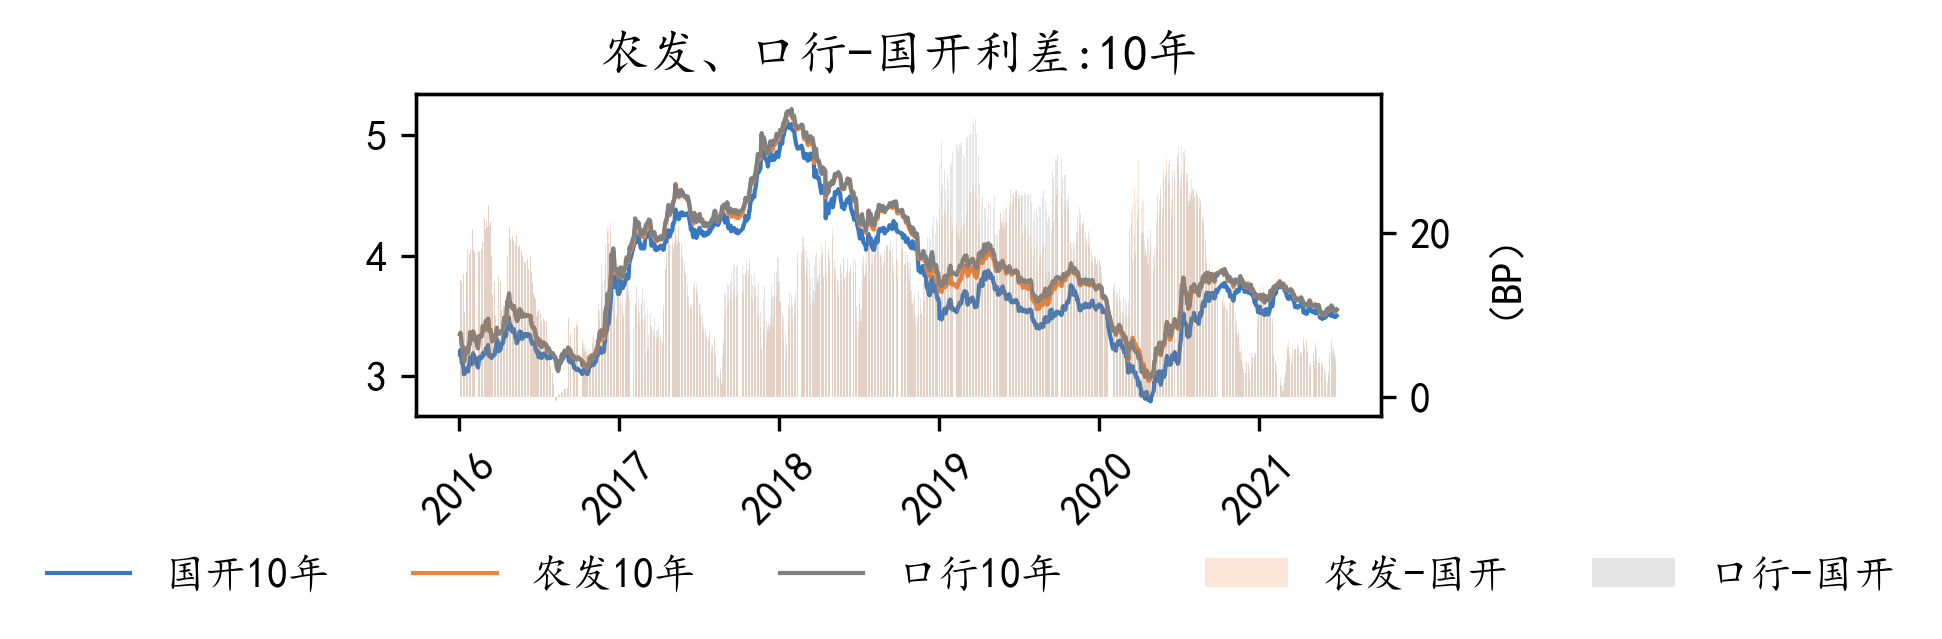

In [45]:
#农发、口行-国开利差:10年
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates2.index,rates2['国开10年'],'#3778bf',label="国开10年",linewidth=1)
plt.plot(rates2.index,rates2['农发10年'],'#f0833a',label='农发10年',linewidth=1)
plt.plot(rates2.index,rates2['口行10年'],'gray',label='口行10年',linewidth=1)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(-0.4,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.xticks(fontsize=10 ,rotation=45)
plt.yticks(fontsize=10,rotation=0)

plt.twinx()
plt.bar(rates2.index,rates2['农发-国开'], width=1, color='#f0833a',alpha = 0.2,label='农发-国开')
plt.bar(rates2.index,rates2['口行-国开'], width=1, color='gray',alpha = 0.2,label='口行-国开')
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.8,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.ylabel('（BP）',fontsize=10)
plt.title('农发、口行-国开利差:10年', fontsize=12)
plt.savefig('农发、口行-国开利差10年.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

In [46]:
secondary_rate_sec

,方向,类型,剩余期限,代码,简称,浮动利率,含权,价格,价格备注,成交久期,昨日平均,昨日中债估值,中债估值备注,中证估值,成交-中债(BP),成交-中证(BP),债券余额(亿),时间,date
0,GVN,国开,4.79Y,210203.IB,21国开03,固定利率,不含权,3.2700,None,NaN,3.249,3.255,None,3.2500,1.50,2.00,1123.5,20:00:15,2021-05-17
1,GVN,国债,4.82Y,210002.IB,21附息国债02,固定利率,不含权,2.9400,到期,NaN,2.917,2.92,到期,2.9225,2.00,1.75,1110.0,18:27:42,2021-05-17
2,GVN,国债,4.82Y,210002.IB,21附息国债02,固定利率,不含权,2.9400,到期,NaN,2.917,2.92,到期,2.9225,2.00,1.75,1110.0,18:27:42,2021-05-17
3,GVN,国债,4.82Y,210002.IB,21附息国债02,固定利率,不含权,2.9400,到期,NaN,2.917,2.92,到期,2.9225,2.00,1.75,1110.0,18:16:38,2021-05-17
4,TKN,国开,9.43Y,200215.IB,20国开15,固定利率,不含权,3.5850,到期,NaN,3.573,3.5775,到期,3.5762,0.75,0.88,2736.6,18:05:58,2021-05-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234237,GVN,国开,9.69Y,210205.IB,21国开05,固定利率,不含权,3.5275,None,NaN,3.525,3.5225,None,3.5225,0.50,0.50,2690.0,08:14:37,2021-06-22
234238,GVN,国开,9.69Y,210205.IB,21国开05,固定利率,不含权,3.5250,到期,NaN,3.525,3.5225,到期,3.5225,0.25,0.25,2690.0,08:14:08,2021-06-22
234239,GVN,国开,9.69Y,210205.IB,21国开05,固定利率,不含权,3.5275,None,NaN,3.525,3.5225,None,3.5225,0.50,0.50,2690.0,08:13:26,2021-06-22
234240,GVN,国开,9.69Y,210205.IB,21国开05,固定利率,不含权,3.5275,到期,NaN,3.525,3.5225,到期,3.5225,0.50,0.50,2690.0,08:08:21,2021-06-22


In [47]:
#筛选200205
secondary_rate_sec1 = secondary_rate_sec.loc[secondary_rate_sec['代码'] == '200205.IB']
a = secondary_rate_sec1.groupby(['date'])['价格'].mean()
#筛选200210
secondary_rate_sec1 = secondary_rate_sec.loc[secondary_rate_sec['代码'] == '200210.IB']
b = secondary_rate_sec1.groupby(['date'])['价格'].mean()
df = pd.concat([a,b],axis=1)
df.columns = ['200205','200210']
df['200205-200210'] = (df['200205'] - df['200210'])*100
df

,200205,200210,200205-200210
date,,,
2021-03-15,3.715781,3.718026,-0.224507
2021-03-16,3.705000,3.707457,-0.245652
2021-03-18,3.700000,3.703286,-0.328571
2021-03-19,3.688214,3.688215,-0.000099
2021-03-26,3.645000,3.641177,0.382278
...,...,...,...
2021-06-21,3.544677,3.543194,0.148297
2021-06-22,3.540000,3.544574,-0.457353
2021-06-23,3.539125,3.538258,0.086742


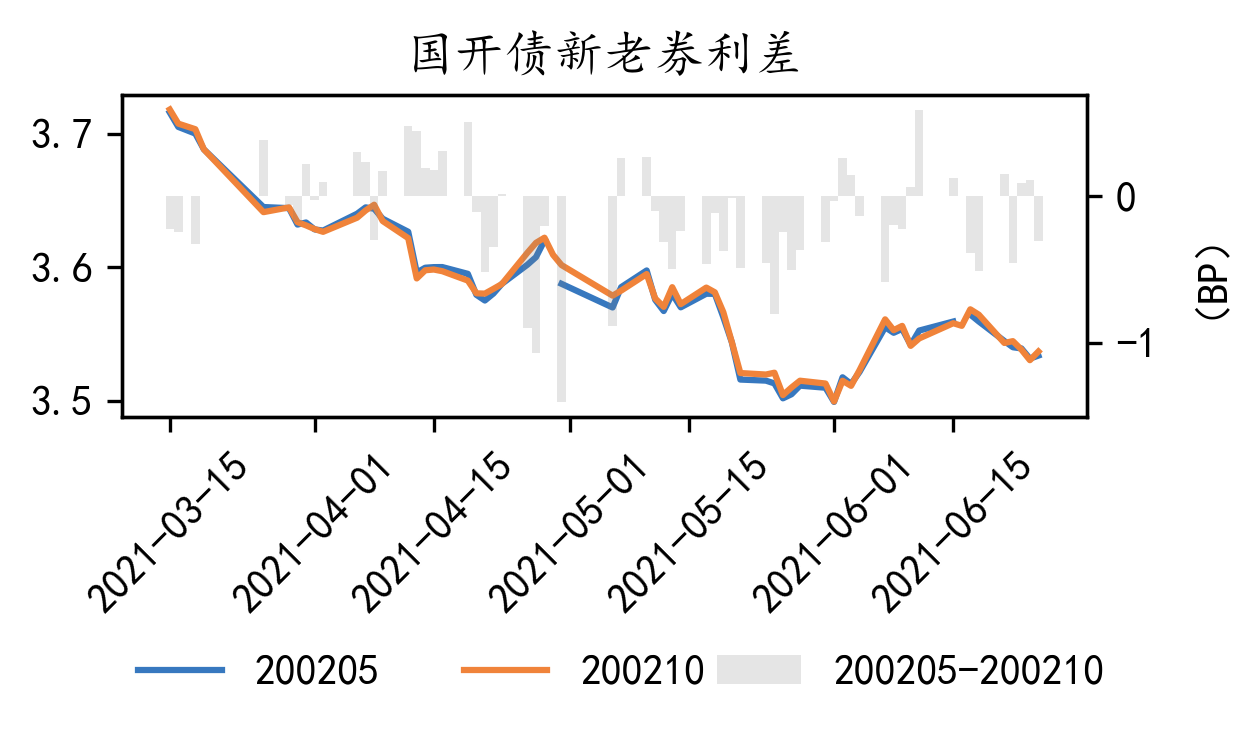

In [51]:
#国开债新老券利差
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(df.index,df['200205'],'#3778bf',label="200205")
plt.plot(df.index,df['200210'],'#f0833a',label='200210')
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0,-0.9),borderaxespad = 0.,fontsize=10,frameon=False)
plt.xticks(fontsize=10 ,rotation=45)
plt.yticks(fontsize=10,rotation=0)

plt.twinx()
plt.bar(df.index,df['200205-200210'], width=1, color='gray',alpha = 0.2,label='200205-200210')
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.6,-0.9),borderaxespad = 0.,fontsize=10,frameon=False)
plt.ylabel('（BP）',fontsize=10)
plt.title('国开债新老券利差', fontsize=12)
plt.savefig('国开债新老券利差.jpg', dpi=300, bbox_inches = 'tight')
plt.show()